In [ ]:
wbcd <- read.csv('/content/dfnew.csv', header = TRUE)
names(wbcd)

[1] "Age"       "Gender"    "Education" "Country"   "Ethnicity" "Nscore"   
 [7] "Escore"    "Oscore"    "Ascore"    "Cscore"    "Impulsive" "SS"       
[13] "Alcohol"   "Amphet"    "Amyl"      "Benzos"    "Caff"      "Cannabis" 
[19] "Choc"      "Coke"      "Crack"     "Ecstasy"   "Heroin"    "Ketamine" 
[25] "Legalh"    "LSD"       "Meth"      "Mushrooms" "Nicotine"  "Semer"    
[31] "VSA"

# Cannabis

In [ ]:
set.seed(6)
random_index <- sample(nrow(wbcd), 469) 
wbcd_train <- wbcd[random_index, -(1:2)]
wbcd_test <- wbcd[-random_index, -(1:2)]
wbcd_train_labels <- wbcd[random_index, ]$Cannabis
wbcd_test_labels <- wbcd[-random_index, ]$Cannabis
wbcd_train_n <- wbcd_train
wbcd_test_n <- wbcd_test

train_min <- apply(wbcd_train, 2, min)
train_max <- apply(wbcd_train, 2, max)
for (i in 1:ncol(wbcd_train)) {
  wbcd_train_n[, i] <- (wbcd_train[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}
library(class)
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, 
                     cl = wbcd_train_labels, k = 21)

In [ ]:
result_table <- table(wbcd_test_labels, knn_predicted)
result_table
paste('Testing accuracy is:', sum(diag(result_table)) / sum(result_table))

                knn_predicted
wbcd_test_labels   0   1   2   3   4   5   6
               0 293  18   9   4   0   0   0
               1 100  24  25   4   0   0   1
               2  52  39  65  26   2   3  13
               3   1   7  74  25   2  12  40
               4   0   1  18  10   1   8  66
               5   0   0  14   3   0   8 108
               6   0   0  10   3   0  10 316

[1] "Testing accuracy is: 0.517314487632509"

In [ ]:
k <- c(1, 5, 11, 15, 21, 27)
result <- matrix(0, nrow = length(k), ncol = 4)
result[, 1] <- k
colnames(result) = c("k value", "False Negatives", "False Positives", 
                     "Percent Classified Correctly")

for (i in 1:length(k)) {
  knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n,
                       cl = wbcd_train_labels, k = k[i])
  confusion_matrix <- table(wbcd_test_labels, knn_predicted)
  result[i, 2] <- confusion_matrix[2, 1]
  result[i, 3] <- confusion_matrix[1, 2]
  result[i, 4] <- sum(diag(confusion_matrix)) / length(wbcd_test_labels)
}

result

k value,False Negatives,False Positives,Percent Classified Correctly
1,73,61,0.4734982
5,84,39,0.5102473
11,88,28,0.5180212
15,96,26,0.5173145
21,101,18,0.5229682
27,107,11,0.5130742


Warning message in plot.window(...):
“"print.thres" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"print.thres" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"print.thres" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"print.thres" is not a graphical parameter”
Warning message in box(...):
“"print.thres" is not a graphical parameter”
Warning message in title(...):
“"print.thres" is not a graphical parameter”


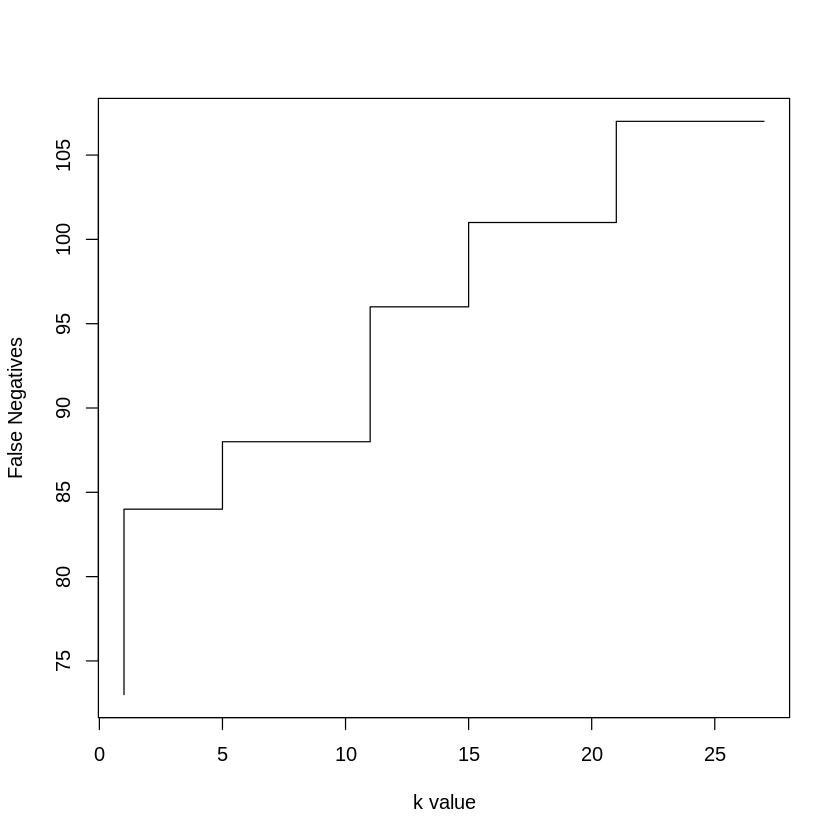

In [ ]:
plot(result, print.thres = 0.5, type="S")

# Second method Cannabis

In [ ]:
library(caret)
set.seed(300)
indxTrain <- createDataPartition(y = wbcd$Cannabis,p = 0.75,list = FALSE)
training <- wbcd[indxTrain,]
testing <- wbcd[-indxTrain,]
prop.table(table(training$Cannabis)) * 100
prop.table(table(testing$Cannabis)) * 100


In [ ]:
trainX <- training[,names(training) != "Cannabis"]
preProcValues <- preProcess(x = trainX,method = c("center", "scale"))
preProcValues

set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) #,classProbs=TRUE,summaryFunction = twoClassSummary)
knnFit <- train(Cannabis ~ ., data = training, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)
knnFit

Created from 1415 samples and 30 variables

Pre-processing:
  - centered (30)
  - ignored (0)
  - scaled (30)


k-Nearest Neighbors 

1415 samples
  30 predictor

Pre-processing: centered (30), scaled (30) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1273, 1274, 1274, 1273, 1273, 1274, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  1.512379  0.5808459  1.136307
   7  1.492108  0.5891606  1.131902
   9  1.490570  0.5895783  1.136540
  11  1.487723  0.5916470  1.141933
  13  1.483403  0.5935438  1.143835
  15  1.482616  0.5939944  1.147688
  17  1.482402  0.5941216  1.147160
  19  1.485188  0.5936262  1.151035
  21  1.486595  0.5935935  1.154265
  23  1.488204  0.5933651  1.158523
  25  1.490998  0.5917363  1.162562
  27  1.490963  0.5922303  1.164425
  29  1.491305  0.5924979  1.166215
  31  1.490418  0.5933731  1.166610
  33  1.491277  0.5933236  1.166968
  35  1.491794  0.5935422  1.168370
  37  1.494381  0.5927248  1.171739
  39  1.495590  0.5923946  1.172128
  41  1.495679  0.5926568  1.172187
  43  1.498452  

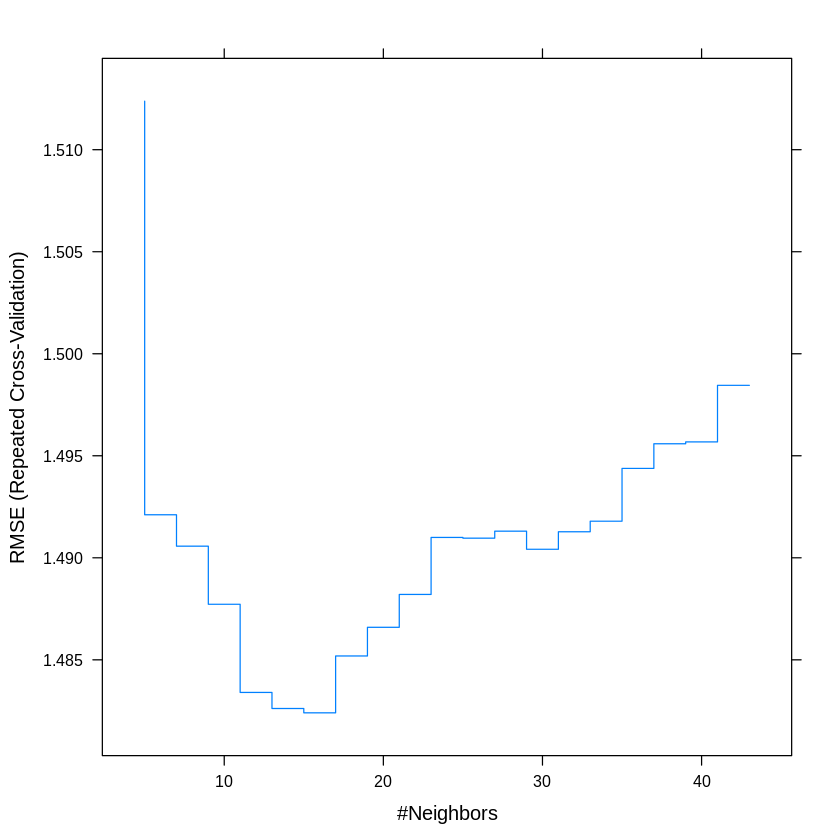

In [ ]:
plot(knnFit, print.thres = 0.5, type="S")

# Coke

In [ ]:
set.seed(6)
random_index <- sample(nrow(wbcd), 469) 
wbcd_train <- wbcd[random_index, -(1:2)]
wbcd_test <- wbcd[-random_index, -(1:2)]
wbcd_train_labels1 <- wbcd[random_index, ]$Coke
wbcd_test_labels1 <- wbcd[-random_index, ]$Coke
wbcd_train_n <- wbcd_train
wbcd_test_n <- wbcd_test

train_min <- apply(wbcd_train, 2, min)
train_max <- apply(wbcd_train, 2, max)
for (i in 1:ncol(wbcd_train)) {
  wbcd_train_n[, i] <- (wbcd_train[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}
library(class)
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, 
                     cl = wbcd_train_labels1, k = 21)

In [ ]:
result_table <- table(wbcd_test_labels1, knn_predicted)
result_table
paste('Testing accuracy is:', sum(diag(result_table)) / sum(result_table))

                 knn_predicted
wbcd_test_labels1   0   1   2   3   4   5   6
                0 762   3  21   3   0   0   0
                1 101   1   9   3   0   0   0
                2  76   7  77  36   0   0   0
                3  16   1  88  95   0   0   0
                4   4   0  19  49   0   0   0
                5   0   0   9  23   0   0   0
                6   0   0   4   8   0   0   0

[1] "Testing accuracy is: 0.660777385159011"

# Age

In [ ]:
set.seed(6)
random_index <- sample(nrow(wbcd), 469) 
wbcd_train <- wbcd[random_index, -(1:2)]
wbcd_test <- wbcd[-random_index, -(1:2)]
wbcd_train_labels <- wbcd[random_index, ]$Age
wbcd_test_labels <- wbcd[-random_index, ]$Age
wbcd_train_n <- wbcd_train
wbcd_test_n <- wbcd_test

train_min <- apply(wbcd_train, 2, min)
train_max <- apply(wbcd_train, 2, max)
for (i in 1:ncol(wbcd_train)) {
  wbcd_train_n[, i] <- (wbcd_train[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}
library(class)
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, 
                     cl = wbcd_train_labels, k = 21)

result_table <- table(wbcd_test_labels1, knn_predicted)
result_table
paste('Testing accuracy is:', sum(diag(result_table)) / sum(result_table))

                 knn_predicted
wbcd_test_labels1 -0.95197 -0.07854 0.49788 1.09449 1.82213 2.59171
                0      193      286     148     161       1       0
                1       39       36      30       9       0       0
                2       97       52      40       7       0       0
                3      149       40      11       0       0       0
                4       61       10       1       0       0       0
                5       26        6       0       0       0       0
                6        8        4       0       0       0       0

[1] "Testing accuracy is: 0.190106007067138"

# Alcohol

In [ ]:
set.seed(6)
random_index <- sample(nrow(wbcd), 469) 
wbcd_train <- wbcd[random_index, -(1:2)]
wbcd_test <- wbcd[-random_index, -(1:2)]
wbcd_train_labels <- wbcd[random_index, ]$Alcohol
wbcd_test_labels <- wbcd[-random_index, ]$Alcohol
wbcd_train_n <- wbcd_train
wbcd_test_n <- wbcd_test

train_min <- apply(wbcd_train, 2, min)
train_max <- apply(wbcd_train, 2, max)
for (i in 1:ncol(wbcd_train)) {
  wbcd_train_n[, i] <- (wbcd_train[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}
library(class)
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, 
                     cl = wbcd_train_labels, k = 21)

result_table <- table(wbcd_test_labels1, knn_predicted)
result_table
paste('Testing accuracy is:', sum(diag(result_table)) / sum(result_table))

                 knn_predicted
wbcd_test_labels1   0   1   2   3   4   5   6
                0   0   0   0  18  24 606 141
                1   0   0   0  11   3  84  16
                2   0   0   0  15   6 147  28
                3   0   0   0   6   3 161  30
                4   0   0   0   2   1  55  14
                5   0   0   0   0   0  26   6
                6   0   0   0   0   0  10   2

[1] "Testing accuracy is: 0.0247349823321555"

# Mushrooms

In [ ]:
set.seed(6)
random_index <- sample(nrow(wbcd), 469) 
wbcd_train <- wbcd[random_index, -(1:2)]
wbcd_test <- wbcd[-random_index, -(1:2)]
wbcd_train_labels <- wbcd[random_index, ]$Mushrooms
wbcd_test_labels <- wbcd[-random_index, ]$Mushrooms
wbcd_train_n <- wbcd_train
wbcd_test_n <- wbcd_test

train_min <- apply(wbcd_train, 2, min)
train_max <- apply(wbcd_train, 2, max)
for (i in 1:ncol(wbcd_train)) {
  wbcd_train_n[, i] <- (wbcd_train[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}
library(class)
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, 
                     cl = wbcd_train_labels, k = 21)

result_table <- table(wbcd_test_labels1, knn_predicted)
result_table
paste('Testing accuracy is:', sum(diag(result_table)) / sum(result_table))

                 knn_predicted
wbcd_test_labels1   0   1   2   3   4   5   6
                0 644  10  28 102   5   0   0
                1  84   5  17   7   1   0   0
                2  80  17  57  41   1   0   0
                3  30   8 103  51   8   0   0
                4   9   0  38  17   8   0   0
                5   4   0  20   4   4   0   0
                6   2   0   6   1   3   0   0

[1] "Testing accuracy is: 0.540636042402827"

# LSD

In [ ]:
set.seed(6)
random_index <- sample(nrow(wbcd), 469) 
wbcd_train <- wbcd[random_index, -(1:2)]
wbcd_test <- wbcd[-random_index, -(1:2)]
wbcd_train_labels <- wbcd[random_index, ]$LSD
wbcd_test_labels <- wbcd[-random_index, ]$LSD
wbcd_train_n <- wbcd_train
wbcd_test_n <- wbcd_test

train_min <- apply(wbcd_train, 2, min)
train_max <- apply(wbcd_train, 2, max)
for (i in 1:ncol(wbcd_train)) {
  wbcd_train_n[, i] <- (wbcd_train[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}
library(class)
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, 
                     cl = wbcd_train_labels, k = 21)

result_table <- table(wbcd_test_labels1, knn_predicted)
result_table
paste('Testing accuracy is:', sum(diag(result_table)) / sum(result_table))

                 knn_predicted
wbcd_test_labels1   0   1   2   3   4   5   6
                0 692   4   1  92   0   0   0
                1 101   5   2   6   0   0   0
                2 105  24  23  44   0   0   0
                3  71   9  41  77   1   1   0
                4  28   0  16  28   0   0   0
                5  12   0   9  11   0   0   0
                6   4   0   3   5   0   0   0

[1] "Testing accuracy is: 0.563250883392226"